In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

#importing necessary data to achieve the analysis
#Show sample from the training and test dataset

In [2]:
training_data=pd.read_csv("Training.csv") 
testing_data=pd.read_csv("Testing.csv")

In [3]:
training_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
testing_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,120,72,22,56,20.8,0.733,48,0
1,1,71,62,0,0,21.8,0.416,26,0
2,8,74,70,40,49,35.3,0.705,39,0
3,5,88,78,30,0,27.6,0.258,37,0
4,10,115,98,0,0,24.0,1.022,34,0


#Checking null values. Null values can affect the quality of the training model

In [5]:
training_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#Counting the number of the occurrences of each class in the outcome target variable to understand balance of classes in datset

In [6]:
training_data["Outcome"].value_counts()

Outcome
0    1500
1     960
Name: count, dtype: int64

In [7]:
training_data.shape

(2460, 9)

In [8]:
testing_data.shape

(308, 9)

In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [10]:
training_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#Getting Statistics 

In [11]:
training_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


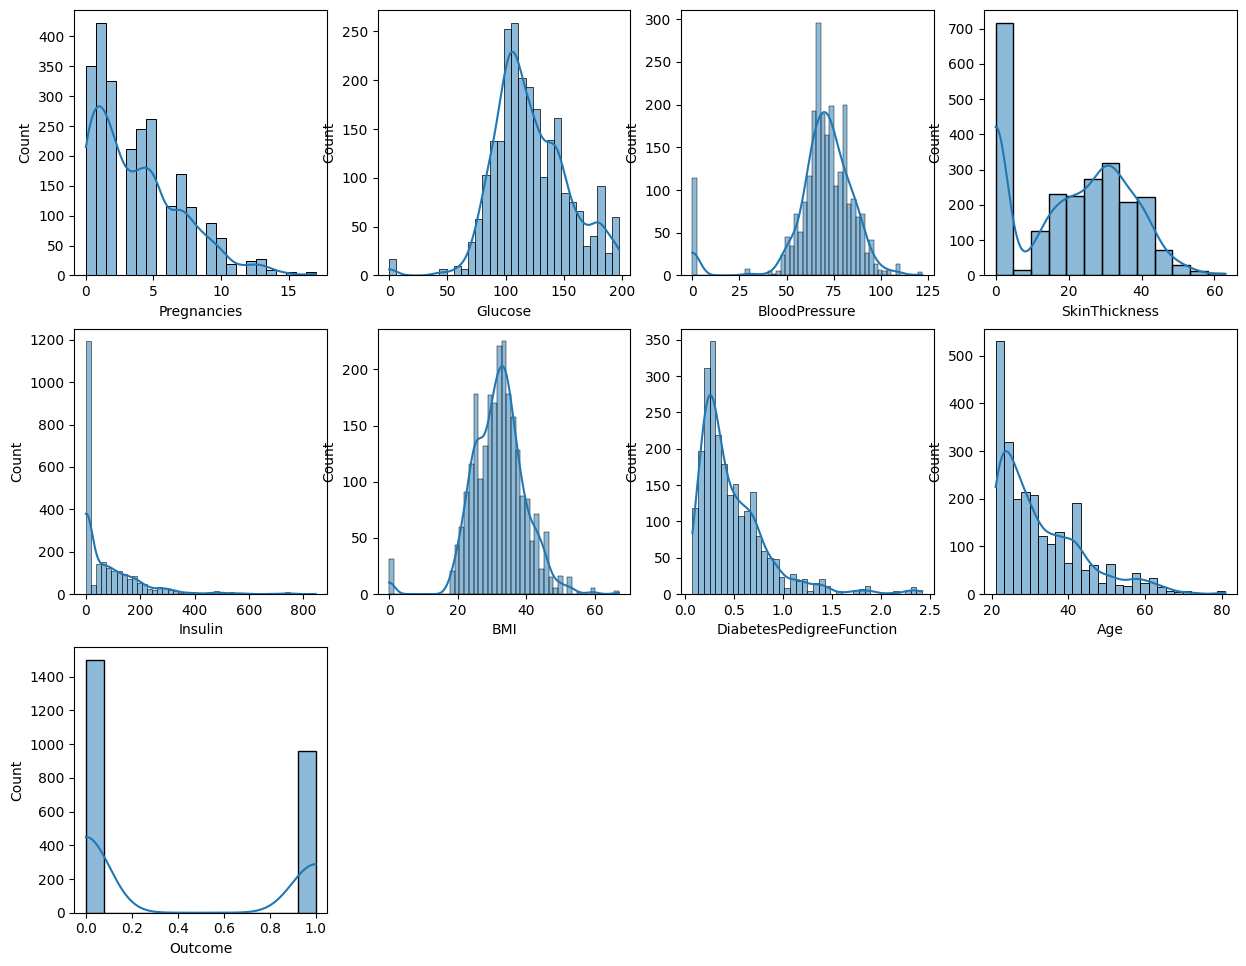

In [12]:
plt.figure(figsize=(15,20))
for i in range (1, len(training_data.columns)+1):
    plt.subplot(5,4,i)
    sns.histplot(training_data[training_data.columns[i-1]], kde=True)

#Generate correlation and visualising them

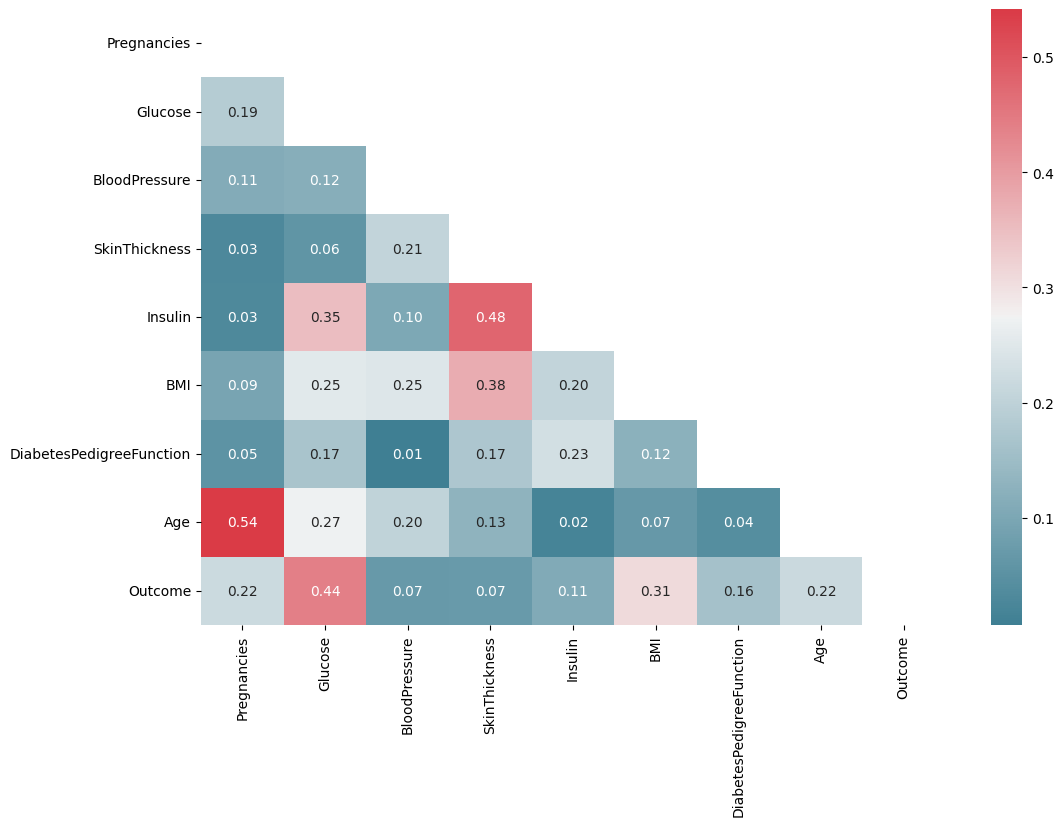

In [13]:
corr_training_data=training_data.corr()
plt.figure(figsize=(12,8))
mask=np.triu(np.ones_like(corr_training_data, dtype=bool))
sns.heatmap(corr_training_data.abs(),mask=mask, cmap=sns.diverging_palette(220,10, as_cmap=True), annot=True, fmt=".2f")
plt.show()

In [14]:
x=training_data.drop(["Outcome"], axis=1)
y=training_data["Outcome"]
x.shape

(2460, 8)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=430)
print("Train data:", len(x_train))
print("Test data:", len(x_test))

Train data: 1968
Test data: 492


Logistic-Regression 
Eftersom i det här fallet försöker man förutsäga om en person har eller inte har diabetes, och den har en binär variabler som är ("Outcome") och eftersom logistic-regression är en vanlig algoritm för binära klassificering har jag valt att använda den för att förutsäga resultaten baserat på de modeller algoritmmen är tränat på 

In [27]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=100, solver="liblinear", multi_class="ovr",class_weight='balanced',)
logreg.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='ovr',
                   solver='liblinear')

In [28]:
from sklearn.metrics import accuracy_score 
y_pred=logreg.predict(x_test)
accuracy= accuracy_score(y_pred, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.7073170731707317


#Support vector machine eftersom insamlade datan (hälsomåtten) och diabetes är inte linjärt och algoritmen är effektiv med binär data klassificering är algoritmen lämpligt att använda 

In [18]:
from sklearn import svm

In [19]:
svm_algo=svm.SVC(kernel="linear")
svm_algo.fit(x_train, y_train)

SVC(kernel='linear')

#om jag optimerar algoritmen med class_weight så får jag ett sämre resultat än vad jag fick innan jag #optimerade den
#svm_algo=svm.SVC(kernel="linear", class_weight='balanced')

In [20]:
svm_y_pred=svm_algo.predict(x_test)
accuracy=accuracy_score(svm_y_pred, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.7296747967479674


In [21]:
#from sklearn.model_selection import GridSearchCV
#param_grid={'C': [0.1, 2, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001], 'kernel':['linear', 'rbf']}
#grid=GridSearchCV(svm.SVC(class_weight='balanced'), param_grid, refit=True, verbose=3)
#grid.fit(x_train, y_train)
#print("Bästa hyperparameter: ", grid_best_params_)
#svm_y_pred=grid.predict(x_test)
#print(accuracy_score(svm_y_pred, y_test))

#DecisionTree
#Eftersom datasetet inte har sammanband mellan oberoende varibler är det lämpligt att använda denna algoritm 

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
deci_tree=DecisionTreeClassifier(random_state=42)
deci_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
deci_tree_y_pred=deci_tree.predict(x_test)
accuracy=accuracy_score(deci_tree_y_pred, y_test)
print(accuracy)

0.991869918699187
